In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
df = pd.read_csv(r'''data/footballmatchdata.csv''', delimiter = ",")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo', "Loaned From"],axis=1,inplace=True)

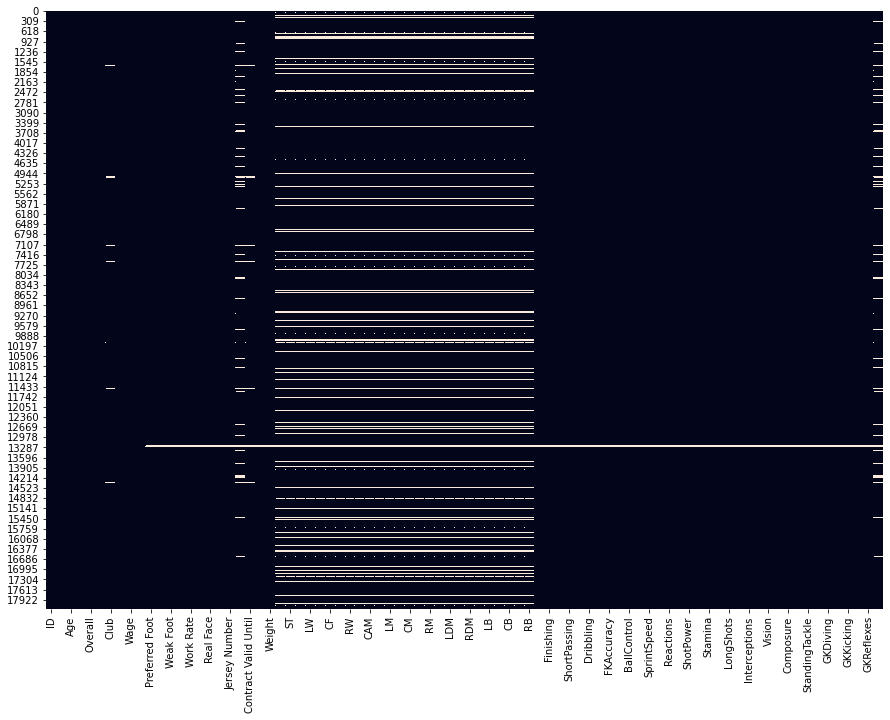

In [5]:
plt.figure(figsize=(15,11))
sns.heatmap(df.isnull(), cbar=False);

In [6]:
df.isnull().sum().sort_values(ascending=False)

CDM          2085
RB           2085
CB           2085
LCB          2085
LB           2085
             ... 
Special         0
Potential       0
Value           0
Wage            0
ID              0
Length: 84, dtype: int64

In [7]:
# pandas_profiling.ProfileReport(df)

In [8]:
def convert_str_to_numeric(value):
    value = value.replace("€","")
    
    if value.endswith("M"):
        return float(value.split("M")[0]) * 1000000
    
    elif value.endswith("K"):
        return float(value.split("K")[0]) * 1000
    
df['Value'] = df['Value'].apply(convert_str_to_numeric)
df['Wage'] = df['Wage'].apply(convert_str_to_numeric)

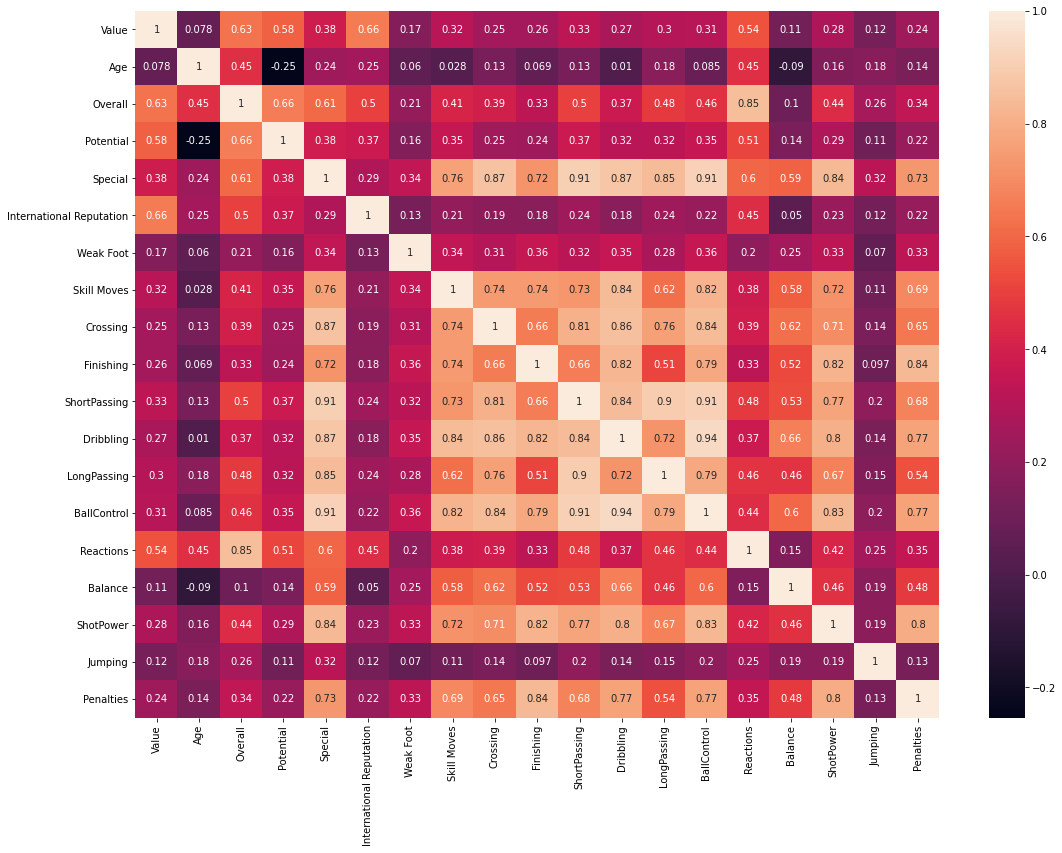

In [9]:
#take same colums

columns = ['Value','Age','Overall','Potential','Special','Release Clause',
        'International Reputation','Weak Foot','Skill Moves','Crossing',
       'Finishing', 'ShortPassing', 'Dribbling',
       'LongPassing', 'BallControl',  'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Penalties']
plt.figure(figsize=(18,13))
sns.heatmap(df[columns].corr(),annot = True);

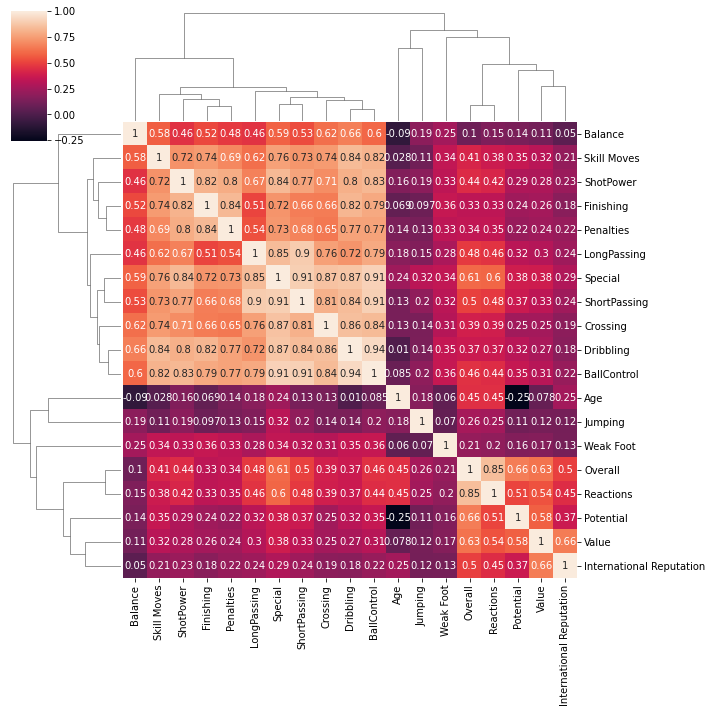

In [10]:
sns.clustermap(df[columns].corr(),annot = False);

(85.0, 95.0)

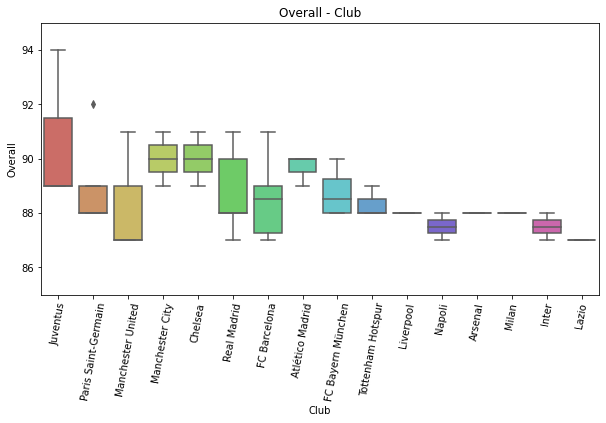

In [11]:
plt.figure(figsize = (10,5))
pl = sns.boxplot(x=df['Club'][1:50], y=df['Overall'], palette='hls');
pl.set_title(label='Overall - Club');
plt.xlabel('Club')
plt.ylabel('Overall')
plt.xticks(rotation = 80)
plt.ylim(85, 95)

In [12]:
clubs = ("Juventus", "Chelsea", "FC Barcelona" ,"Beşiktaş JK", "Real Madrid") # <3 Beşiktaş <3

df_col = df[['Name','Overall','Club']]
group_clubs = df_col.groupby('Club').groups

for i in clubs:
    indices = group_clubs[i]
    print(df_col.loc[[*indices]].sort_values(by='Overall',ascending=False).head(5))

                 Name  Overall      Club
1   Cristiano Ronaldo       94  Juventus
24       G. Chiellini       89  Juventus
15          P. Dybala       89  Juventus
64        Alex Sandro       86  Juventus
65      Douglas Costa       86  Juventus
            Name  Overall     Club
5      E. Hazard       91  Chelsea
14      N. Kanté       89  Chelsea
69   Azpilicueta       86  Chelsea
121     Jorginho       84  Chelsea
140      Willian       84  Chelsea
               Name  Overall          Club
0          L. Messi       94  FC Barcelona
7         L. Suárez       91  FC Barcelona
18    M. ter Stegen       89  FC Barcelona
20  Sergio Busquets       89  FC Barcelona
32         Coutinho       88  FC Barcelona
          Name  Overall         Club
108       Pepe       85  Beşiktaş JK
153   Quaresma       84  Beşiktaş JK
369   G. Medel       81  Beşiktaş JK
478    D. Vida       80  Beşiktaş JK
496  A. Ljajić       80  Beşiktaş JK
            Name  Overall         Club
6      L. Modrić       91

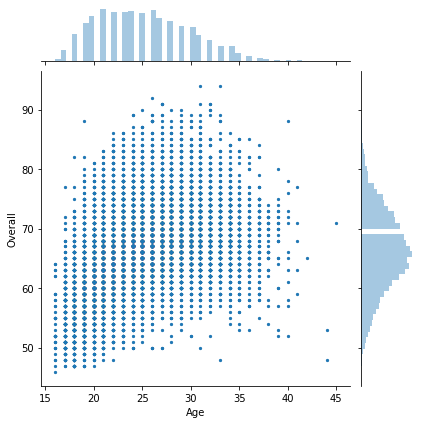

In [13]:
sns.jointplot(df['Age'],df['Overall'],joint_kws={'s':5});

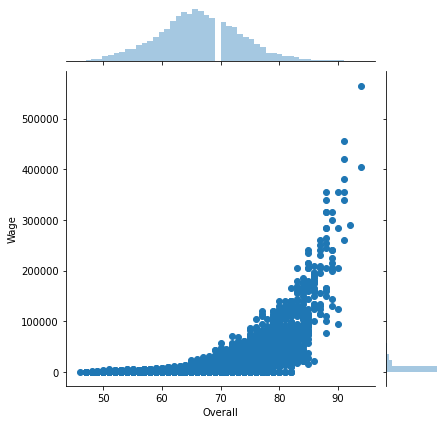

In [14]:
sns.jointplot(x=df['Overall'], y=df['Wage']);

In [15]:
df["Age_categ"]=pd.cut(df.Age,[15,20,25,30,35,40,45],labels=["15-20", "20-25", "25-30", "30-35", "35-40", "40-45"]) 

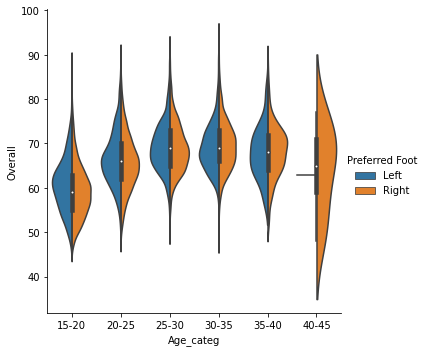

In [16]:
sns.catplot("Age_categ", "Overall", data=df, kind="violin", hue= "Preferred Foot",split=True);

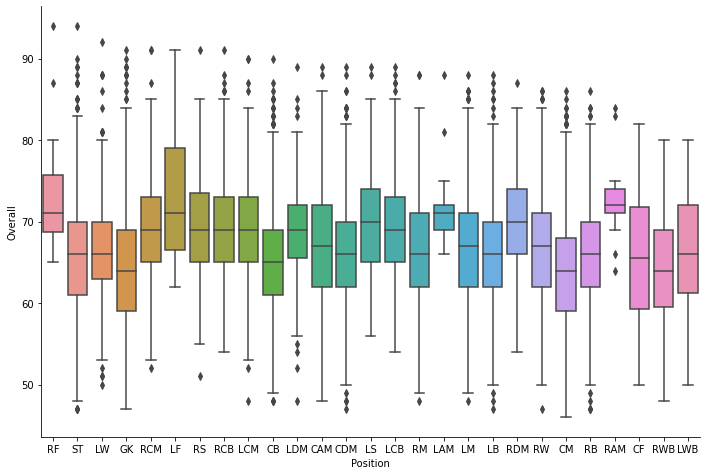

In [17]:
sns.catplot("Position", "Overall", data=df, kind="box").fig.set_size_inches(11,7)

In [18]:
df.groupby(by='Nationality')['Overall'].mean().sort_values(ascending=False).head(10)

Nationality
United Arab Emirates    77.000000
Central African Rep.    73.333333
Israel                  72.142857
Dominican Republic      72.000000
Oman                    72.000000
São Tomé & Príncipe     72.000000
Cape Verde              71.631579
Portugal                71.344720
Togo                    71.333333
Brazil                  71.251511
Name: Overall, dtype: float64